# **A. Setup And Data Loading**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("healthcare_dataset.csv")

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Information Summary:")
print(df.info())

print("\nDescriptive Statistics (Numerical and Categorical):")
print(df.describe(include="all"))

print("\nMissing Values per Column:")
print(df.isnull().sum())


First 5 rows of the DataFrame:
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medi

# **B. DATA SELECTION AND INITIAL VISUALIZATION**

In [3]:
X = df['Age']
Y = df['Billing Amount']

print("--- Task 1: Data Selection and Initial Visualization ---")
print(f"Independent Variable (X): {X.name}")
print(f"Dependent Variable (Y): {Y.name}\n")

--- Task 1: Data Selection and Initial Visualization ---
Independent Variable (X): Age
Dependent Variable (Y): Billing Amount



# ⎆B.1-Compute Summary Statistics

In [4]:
X_mean = X.mean()
Y_mean = Y.mean()
X_var = X.var(ddof=1)
Y_var = Y.var(ddof=1)

print(f"Mean of X ({X.name}): {X_mean:.2f}")
print(f"Mean of Y ({Y.name}): {Y_mean:.2f}")
print(f"Variance of X: {X_var:.2f}")
print(f"Variance of Y: {Y_var:.2f}")

Mean of X (Age): 51.54
Mean of Y (Billing Amount): 25539.32
Variance of X: 384.26
Variance of Y: 201965437.04


# ⎆B.2-Scatter Plot

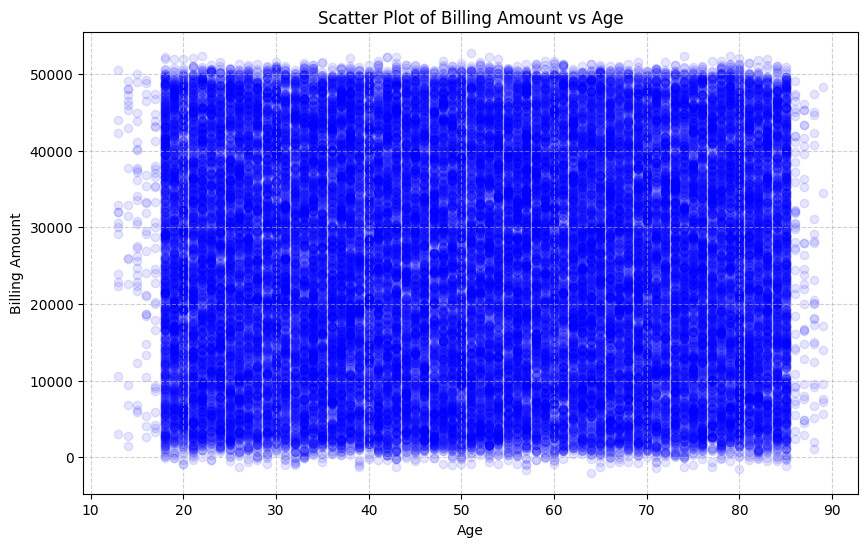

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.1)
plt.title(f'Scatter Plot of {Y.name} vs {X.name}')
plt.xlabel(X.name)
plt.ylabel(Y.name)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **C. MANUAL CALCULATION OF REGRESSION PARAMETERS (SLOPE AND INTERCEPT)**

# ⎆C.1-Calculate Deviation Scores

In [6]:
X_dev = X - X_mean
Y_dev = Y - Y_mean

# ⎆C.2-Calculate Components for the Slope (β1)

In [7]:
# FORMULA: β1 = Σ(Xi - X̄)(Yi - Ȳ) / Σ(Xi - X̄)²
numerator_b1 = (X_dev * Y_dev).sum()
denominator_b1 = (X_dev**2).sum()
b1 = numerator_b1 / denominator_b1

print(f"Slope (β1) for the regression line: {b1:.2f}")
print(f"Numerator (Sum of products of deviations): {numerator_b1:.2f}")
print(f"Denominator (Sum of squared deviations of X): {denominator_b1:.2f}")

Slope (β1) for the regression line: -2.78
Numerator (Sum of products of deviations): -59245185.60
Denominator (Sum of squared deviations of X): 21325834.58


# ⎆C.3-Compute Slope (β1)

In [8]:
beta_1 = numerator_b1 / denominator_b1

print(f"\nComputed Slope (β1): {beta_1:.4f}")


Computed Slope (β1): -2.7781


# ⎆C.4-Compute Intercept (β0)

In [9]:
# FORMULA: β0 = Ȳ - β1 * X̄
beta_0 = Y_mean - beta_1 * X_mean

print(f"Computed Intercept (β0): {beta_0:.4f}")

Computed Intercept (β0): 25682.4976


# ⎆C.5-Formulate the Model

In [10]:
print(f"\nEstimated Regression Equation: Ŷ = {beta_0:.4f} + {beta_1:.4f} * X")


Estimated Regression Equation: Ŷ = 25682.4976 + -2.7781 * X


# **D. VISUALIZATION OF THE FIT**

# ⎆D.1-Generate Predictions (Ŷ)

In [11]:
Y_pred = beta_0 + beta_1 * X

print(f"Predicted values for Y (Ŷ):\n{Y_pred}")

Predicted values for Y (Ŷ):
0        25599.154753
1        25510.255726
2        25471.362402
3        25604.710942
4        25563.039523
             ...     
55495    25565.817618
55496    25513.033821
55497    25576.929996
55498    25563.039523
55499    25535.258577
Name: Age, Length: 55500, dtype: float64


# ⎆D.2-Plot Regression Line

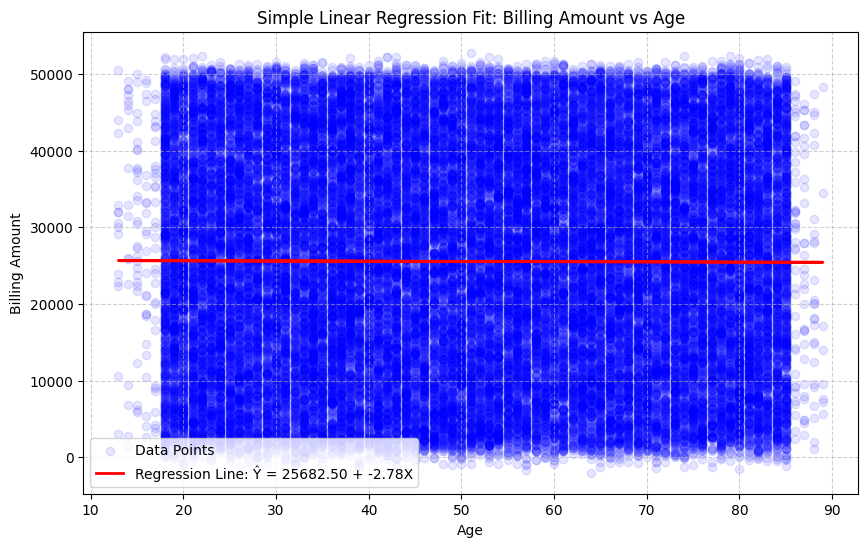

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.1)
plt.plot(X, Y_pred, color='red', linewidth=2, label=f'Regression Line: Ŷ = {beta_0:.2f} + {beta_1:.2f}X')
plt.title(f'Simple Linear Regression Fit: {Y.name} vs {X.name}')
plt.xlabel(X.name)
plt.ylabel(Y.name)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **E. STRENGTH OF RELATIONSHIP (CORRELATION AND R-SQUARED)**

# ⎆E.1-Compute Pearson Correlation Coefficient (r)

In [13]:
sum_squared_deviations_Y = (Y_dev**2).sum()
denominator_r = np.sqrt(denominator_b1 * sum_squared_deviations_Y)

r = numerator_b1 / denominator_r
print(f"Pearson Correlation Coefficient (r): {r:.4f}")

Pearson Correlation Coefficient (r): -0.0038


# ⎆E.2-Compute Coefficient of Determination (R²)

In [14]:
R_squared = r**2
print(f"Coefficient of Determination (R²): {R_squared:.4f}")

Coefficient of Determination (R²): 0.0000


# **F. Scikit-learn Library Solution**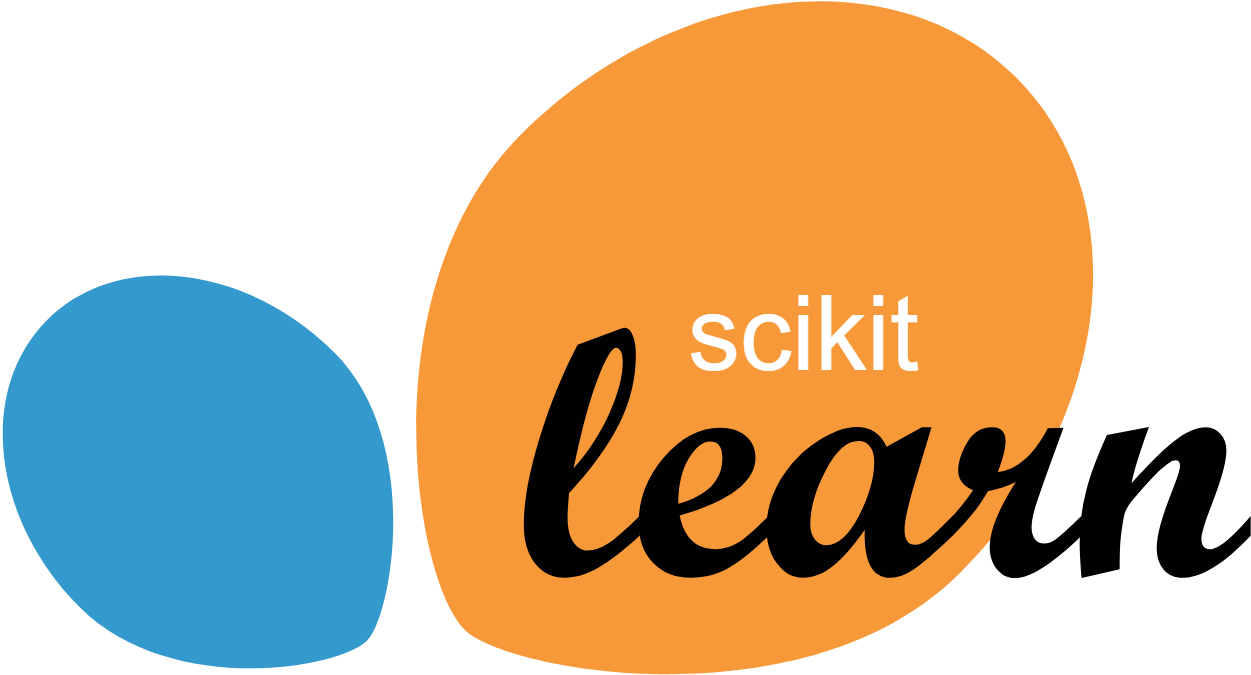

In [15]:
try:
    from sklearn.linear_model import LinearRegression
    print("\n--- OPTIONAL: Verification using scikit-learn ---")

    #Reshape X (required for single feature)
    X_skl = X.values.reshape(-1, 1)

    #Model Traning
    model = LinearRegression()
    model.fit(X_skl, Y)

    #Extracting Parameters
    skl_beta_0 = model.intercept_
    skl_beta_1 = model.coef_[0]
    skl_R_squared = model.score(X_skl, Y)

    print(f"Manual Slope (β1): {beta_1:.4f} | SKL Slope (β1):    {skl_beta_1:.4f}")
    print(f"Manual Intercept (β0): {beta_0:.4f} | SKL Intercept (β0):    {skl_beta_0:.4f}")
    print(f"Manual R²: {R_squared:.4f} | SKL R²:    {skl_R_squared:.4f}")

    if np.isclose(beta_1, skl_beta_1, atol=1e-4) and np.isclose(beta_0, skl_beta_0, atol=1e-4):
        print("\nVerification successful: Manual results match scikit-learn (within tolerance).")
    else:
        print("\nVerification failed: Manual results DO NOT closely match scikit-learn.")

except ImportError:
    print("\nOPTIONAL: scikit-learn is not installed. Skipping comparison.")


--- OPTIONAL: Verification using scikit-learn ---
Manual Slope (β1): -2.7781 | SKL Slope (β1):    -2.7781
Manual Intercept (β0): 25682.4976 | SKL Intercept (β0):    25682.4976
Manual R²: 0.0000 | SKL R²:    0.0000

Verification successful: Manual results match scikit-learn (within tolerance).


# **G. REFLECTION**

In [18]:
print('Visual Fit Assessment: The regression line does not appear to be a good fit for the data points. As observed in the scatter plot, the data points are distributed uniformly across the entire graph with no discernible pattern. The resulting regression line is nearly horizontal, indicating that the model fails to capture any meaningful trend between the variables.')

print('$R^2$ Support: The calculated Coefficient of Determination ($R^2$) of 0.0000 completely supports the visual assessment. It provides mathematical confirmation that 0% of the variation in the billing amount is explained by the patient\'s age. There is no contradiction; both the visual plot and the statistical metric confirm that Age is not a predictor of Billing Amount in this specific dataset.')

print('Real-World Scenario: Although this specific variable pair (Age vs. Billing Amount) yielded no correlation, Simple Linear Regression remains a vital tool in healthcare administration. A more effective real-world application would be modeling "Billing Amount" ($Y$) against "Length of Stay" ($X$). In this scenario, we would expect a strong positive linear relationship, allowing hospital administrators to predict financial returns and manage resource allocation based on how long a patient is admitted.')

Visual Fit Assessment: The regression line does not appear to be a good fit for the data points. As observed in the scatter plot, the data points are distributed uniformly across the entire graph with no discernible pattern. The resulting regression line is nearly horizontal, indicating that the model fails to capture any meaningful trend between the variables.
$R^2$ Support: The calculated Coefficient of Determination ($R^2$) of 0.0000 completely supports the visual assessment. It provides mathematical confirmation that 0% of the variation in the billing amount is explained by the patient's age. There is no contradiction; both the visual plot and the statistical metric confirm that Age is not a predictor of Billing Amount in this specific dataset.
Real-World Scenario: Although this specific variable pair (Age vs. Billing Amount) yielded no correlation, Simple Linear Regression remains a vital tool in healthcare administration. A more effective real-world application would be modeling 